In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('C:/Users/Santiago HG/Desktop/Programas Python Coursera/train.csv')
test = pd.read_csv('C:/Users/Santiago HG/Desktop/Programas Python Coursera/test.csv')

In [3]:
train.head()
#test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#EXPLORACION DE LOS DATOS:  
#Nombre de las columnas y cantidad:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Tamaño de los datos filas y columnas:
train.shape

(891, 12)

In [6]:
#Información de los datos: datos nulos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Comportamiento de las variables categoricas: En este caso Name, Sex, Ticket, Cabin, Embarked
#train.describe(include=['0'])

In [9]:
#ESTUDIO DE LA VARIABLE OBJETIVO
#Se realiza el conteo de las personas que sobrevivieron (Survived) y se separan o se categorizan
#con un Id
# 0 = No sobrevivio
# 1 = Si sobrevivio
train.groupby(["Survived"]).count()["PassengerId"]

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [10]:
#Aquí comparamos los supervivientes respecto al sexo de cada uno
train.groupby(['Survived', 'Sex'])['PassengerId'].count()


Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


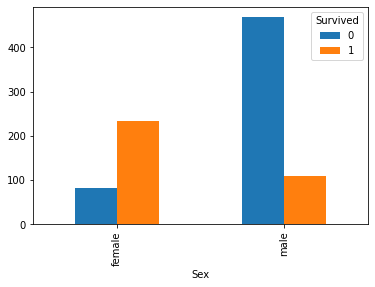

In [11]:
#GRÁFICA DE VARIABLE OBJETIVO (SURVIVED) VS SEX
grupo_sexo = train.groupby(['Survived', 'Sex'])['PassengerId'].count() #Ponemos en una variable la
#comparación entre Survived y Sex para que sea más fácil graficar
print(grupo_sexo) #Mostramos los datos antes de crear la gráfica
(grupo_sexo.unstack(level=0).plot.bar())
#Unstack() se utiliza para desapilar los niveles del índice en un DataFrame o Serie
#En este caso, parece que el código está tratando de desapilar el nivel 0 del índice. 
#Esto significa que si grupo_sexo tenía un índice jerárquico o multinivel, 
#esta operación reorganizará los datos de manera que uno de los niveles del índice se convierta en columnas.
plt.show()
#plot.bar() para generar un gráfico de barras a partir de los datos resultantes.

In [12]:
grupo_sexo.unstack(level=0)

Survived,0,1
Sex,,
female,81,233
male,468,109


AxesSubplot(0.125,0.125;0.775x0.755)


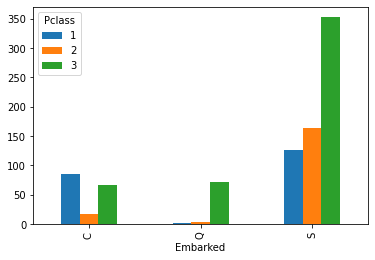

In [13]:
#Comparación entre otras variables.
#En este caso compararemos Embarked y PcClass
# Embarked = Puerto de embarcación
# Pclass = Ticket class 1st, 2nd and 3rd
print(train.groupby(["Pclass" ,"Embarked"])["PassengerId"].count().unstack(level=0).plot.bar())
#En la gráfica notamos la cantidad de pasajeros de cada una de las clases y porque cual puerto
#de embarque ingresaron. Por ejemplo el puerto de embarque que más se uso fur el S.

In [14]:
#PROCESAMIENTO DE LOS DATOS:
#Se eligen las variables que queremos trabajar, o las que necesitemos para dar respuesta a la incognita
#o necesitan que tengamos
train[["Survived", "Sex", "Age", "Pclass"]].head(3)

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3


In [15]:
train[["Survived", "Sex", "Age", "Pclass"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [16]:
#Como podemos ver tenemos datos nulos en nuestra tablas como es el caso de la edad por lo tanto,
#tenemos que usar .isna() para obesrvar la distribución de los datos nulo
(train[train["Age"].isna()].groupby(["Sex", "Pclass"])["PassengerId"].count().unstack(level=0))
#Dicha distribución su mayoria se presenta en la 3ra clase y en el sexo masculino

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


In [17]:
#SibSp = numero de esposas/esposos dentro del barco (parejas)
#Parch = número de padres e hijos dentro del barco(hijos, niños y bebés)
(train[train["Age"].isna()].groupby(["SibSp", "Parch"])["PassengerId"].count().unstack(level=0))
#La mayoria de esas personas ademas de ser hombres y ser de 3ra clase tambien viajaban solos, es decir
#sin esposa y sin hijos

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


In [18]:
#IMPUTAR VARIABLES:
#en el análisis de datos se refiere al proceso de llenar o sustituir los valores faltantes 
#o ausentes en un conjunto de datos con valores estimados o calculados de alguna manera. 
#La imputación de variables es una parte importante del preprocesamiento de datos y es esencial 
#en situaciones donde los datos incompletos podrían afectar negativamente el análisis o 
#los modelos de aprendizaje automático.

In [19]:
#Hallamos la mediana para completar los datos a partir de ella
train["Age"].median()
#Como podemos ver la mediana es 28 por lo tanto este el valor que vamos a poner en la tabla para
#completar los valores nulos

28.0

In [20]:
4#Vamos a imputar ese valor
train["Age"] = train["Age"].fillna(28.0)
#Despues de imputar verificamos los cambios
train[["Survived", "Sex", "Age", "Pclass"]].info()
#Aquí se hicieron los cambios y ahora tenemos todos los datos completos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [21]:
#Ahora el siguiente paso, debemos pasar la variable "Sex" de tipo object a tipo int64 para ello
#hacemos los siguiente:
train["Sex"] = train["Sex"].map({'female' : 1, 'male' : 0}).astype(int)
#Despúes de este comando tendriamos todos nuestros datos como valores enteros:


In [22]:
train[["Survived","Sex","Age","Pclass"]].head(3)

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3


In [23]:
#CREACION DE NUEVAS VARIABLES:
#La variable "Flagsolo" nos permite indicar las personas que viajan solas en el dataframe
#FlagSolo variables 0 y 1
train["FlagSolo"] = np.where(
    (train["SibSp"] == 0) & (train["Parch"] == 0), 1, 0
)
#Cuando el pasajero viaje solo sin hijos y sin pareja
#Tomara un valor de 1 porque cumple la condición
#Tomara 0 cuando no se cumpla alguna

Survived  FlagSolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64


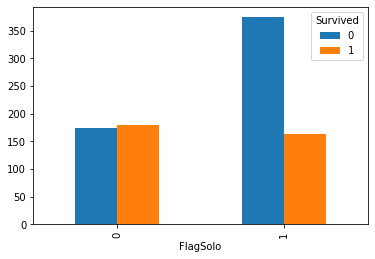

In [24]:
grupo_solo = train.groupby(["Survived", "FlagSolo"])["PassengerId"].count()
print(grupo_solo)
(grupo_solo.unstack(level=0).plot.bar())
plt.show()
#Lo que se observa en la gráfica es que los pasajeros que no viajan solos osea flag = 0 tienen
#un comportamiento similar
#Pero en el caso contrario los que tienen flag = 1 hay una tendencia a que los que viajan
#absolutamente solos tienden a no sobrevivir

In [25]:
train[["Survived","Sex","Age","Pclass","FlagSolo"]].head(3)

,Survived,Sex,Age,Pclass,FlagSolo
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1


In [26]:
#Empezaremos organizando todo para los modelos  
Y_train = train["Survived"] #Nuestra variable objetivo
#Variables independientes:
features = ["Sex","Age","Pclass","FlagSolo"]
X_train = train[features]

print(Y_train.shape, X_train.shape)

(891,) (891, 4)


In [27]:
#MODELOS:
#REGRESION LOGISTICA: es un algoritmo de aprendizaje supervisado que se utiliza 
#principalmente para problemas de clasificación binaria, aunque también se puede 
#extender a problemas de clasificación multiclase.

#ARBOLES DE DECISION: son un algoritmo de aprendizaje automático supervisado 
#que se utiliza tanto para problemas de clasificación como para problemas de regresión. 
#Estos árboles son una representación gráfica de un conjunto de reglas de decisión que se 
#utilizan para tomar decisiones basadas en la información contenida en los datos de entrada.

In [28]:
#Modelo de regresión logistica:
from sklearn.linear_model import LogisticRegression
"""
La biblioteca scikit-learn (sklearn) es una de las bibliotecas más populares en Python 
para el aprendizaje automático (machine learning). Proporciona una amplia gama de herramientas 
y algoritmos para tareas de aprendizaje supervisado y no supervisado, así como para la evaluación 
y selección de modelos.

1.Algoritmos de Aprendizaje Supervisado: scikit-learn incluye implementaciones de una
variedad de algoritmos de aprendizaje supervisado, como regresión lineal, regresión logística,
máquinas de soporte vectorial (SVM), árboles de decisión, Bosque Aleatorio (Random Forest), 
Gradient Boosting, y más. Estos algoritmos se utilizan para problemas de clasificación y regresión.

2.Algoritmos de Aprendizaje No Supervisado: La biblioteca también ofrece algoritmos para 
tareas de aprendizaje no supervisado, como clustering (agrupamiento), reducción de dimensionalidad,
y análisis de componentes principales (PCA).

3. **Preprocesamiento de Datos: scikit-learn proporciona herramientas para el preprocesamiento
de datos, incluyendo escalado, normalización, codificación de variables categóricas y manejo de
valores faltantes.

4.Evaluación de Modelos: Ofrece métricas y funciones para evaluar el rendimiento de los modelos,
como precisión, recall, F1-score, AUC-ROC, y más. También incluye técnicas de validación cruzada
para estimar la capacidad de generalización de un modelo.
"""

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)


LogisticRegression()

In [29]:
#Modelo arboles de decisión
from sklearn.tree import DecisionTreeClassifier

In [30]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [31]:
#Matriz d confusión:
#Una matriz de confusión es una herramienta fundamental en la evaluación de modelos
#de clasificación en aprendizaje automático y estadísticas. Su objetivo es mostrar de
#manera resumida cómo se están clasificando las observaciones por un modelo en comparación
#con las clases reales a las que pertenecen. La matriz de confusión es especialmente útil 
#cuando se trata de problemas de clasificación binaria, pero también puede aplicarse a problemas
#de clasificación multiclase.
from sklearn.metrics import plot_confusion_matrix

def conf_mat_acc(modelo):
    disp = plot_confusion_matrix(modelo, X_train, Y_train, 
                                cmap = plt.cm.Blues, values_format = "d")
    true_pred = disp.confusion_matriz[0,0] + disp.confusion_matriz[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred / total_data
    print("Accuracy: ", np.round(accuracy, 2))
    plt.show() 



ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Users\Santiago HG\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\__init__.py)